<a href="https://colab.research.google.com/github/Noob919/ResearchProject/blob/main/Machine%20Learning/Feature_Selection_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data  = pd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv")

In [3]:
cols = ['Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count',
       'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio',
       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size',
       'Fwd.Header.Length.1', 'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk',
       'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk',
       'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes',
       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'L7Protocol',
       'ProtocolName']

For IoT1 Protocols will be: HTTP_Proxy, HTTP, SSL, Google(For both IoT1 and IoT2), Youtube

In [4]:
list_of_protocols = ["HTTP", "HTTP_PROXY", "SSL", "GOOGLE", "YOUTUBE"]
iot1df = data[data['ProtocolName'].isin(list_of_protocols)][cols]

In [5]:
iot1df.shape

(2841718, 79)

In [6]:
iot1df['ProtocolName'].value_counts()

GOOGLE        959110
HTTP          683734
HTTP_PROXY    623210
SSL           404883
YOUTUBE       170781
Name: ProtocolName, dtype: int64

In [7]:
iot1 = iot1df.groupby(['ProtocolName']).head(200)

In [8]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'ProtocolName' column
iot1['ProtocolName_encoded'] = label_encoder.fit_transform(iot1['ProtocolName'])

<ipython-input-8-ce544f9e0e17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iot1['ProtocolName_encoded'] = label_encoder.fit_transform(iot1['ProtocolName'])


# **Feature Selection**

In [9]:
X = iot1.drop(['ProtocolName','ProtocolName_encoded'], axis=1)
y = iot1['ProtocolName_encoded']

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)

In [13]:
 sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=3)

In [17]:
sfs.get_feature_names_out()

array(['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol'], dtype=object)

In [26]:
dataframe_iot1 = pd.DataFrame(iot1[['Fwd.PSH.Flags','Bwd.PSH.Flags', 'L7Protocol','Total.Fwd.Packets','ProtocolName_encoded']])

In [27]:
dataframe_iot1.head()

,Fwd.PSH.Flags,Bwd.PSH.Flags,L7Protocol,Total.Fwd.Packets,ProtocolName_encoded
0,0,0,131,22,2
1,0,0,131,2,2
2,1,0,7,3,1
3,0,0,7,1,1
4,1,0,131,5,2


# Empty dataframe for store the data

In [90]:
generated_dataframe = pd.DataFrame()

# **Fwd.PSH.Flags**

In [ ]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Fwd.PSH.Flags']

<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

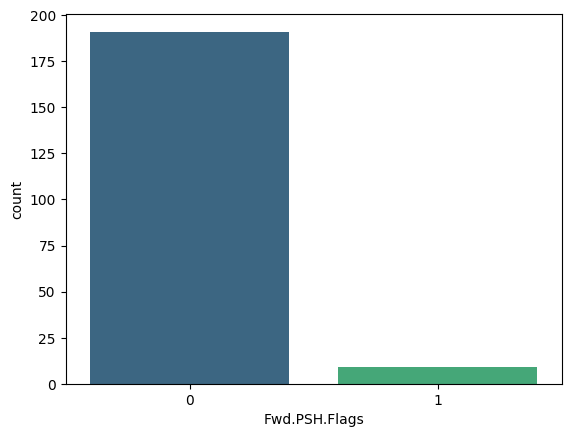

In [57]:
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Fwd.PSH.Flags'],palette='viridis')

In [41]:
#Calculate counts of each category
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Fwd.PSH.Flags'].value_counts()
counts

0    191
1      9
Name: Fwd.PSH.Flags, dtype: int64

In [44]:
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')

In [45]:
normalized_probabilities

array([[0.955, 0.045]])

In [47]:
# Sample data
categories = [0,1]
probabilities = [0.955, 0.045]

# Generate categorical values based on probabilities
num_samples = 200
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [91]:
generated_dataframe['Fwd.PSH.Flags'] = generated_values

In [98]:
generated_dataframe['ProtocolName_encoded'] = np.zeros(200,dtype=int)
generated_dataframe['Bwd.PSH.Flags'] = np.zeros(200,dtype=int)
generated_dataframe['L7Protocol'] = 126

In [99]:
generated_dataframe

,Fwd.PSH.Flags,ProtocolName_encoded,Bwd.PSH.Flags,L7Protocol
0,0,0,0,126
1,0,0,0,126
2,0,0,0,126
3,0,0,0,126
4,0,0,0,126
...,...,...,...,...
195,0,0,0,126
196,0,0,0,126
197,0,0,0,126
198,0,0,0,126


<Axes: ylabel='count'>

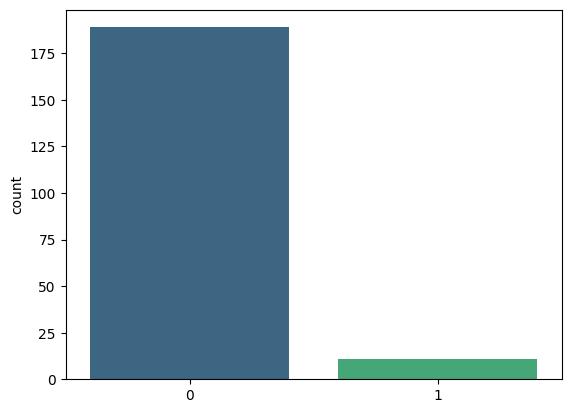

In [51]:
# Create a count plot (bar graph) using Seaborn
sns.countplot(x=generated_values, palette='viridis')

# **Total.Fwd.Packets**

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'].value_counts()

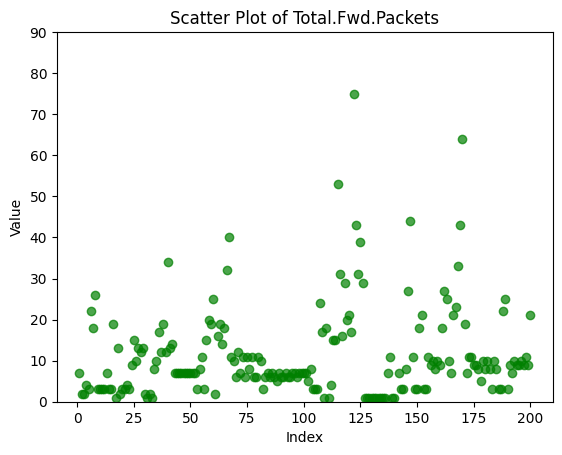

In [69]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')
plt.ylim(0,90)
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

(0.0, 100.0)

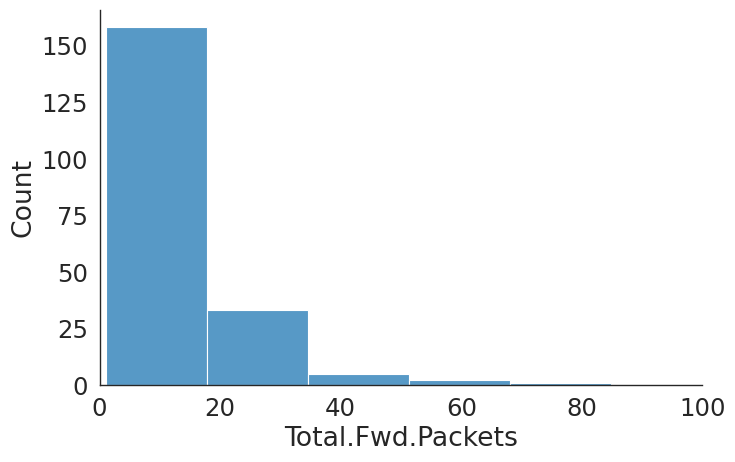

In [71]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataframe_iot1, x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'], kind="hist", bins = 50, aspect =1.5)
plt.xlim(0,100)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1950: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the r

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gibrat,0.0000210400351275,2790.1537734159601314,2796.7504081490560566,inf,0.1251239801984838,0.0034548075133980
johnsonsb,0.0000211122143038,2728.9744667628551724,2742.1677362290474775,inf,0.1297433977492313,0.0021442589818665
johnsonsu,0.0000215706373544,2737.8121854148612329,2751.0054548810535380,inf,0.1293415741269695,0.0022366434001022
lomax,0.0000239796524666,2892.0968706981579999,2901.9918227978018876,inf,0.1463971853848184,0.0003322673131600
powerlognorm,0.0000262785689618,2831.3910064852784672,2844.5842759514707723,inf,0.1400998489573869,0.0006907366810072


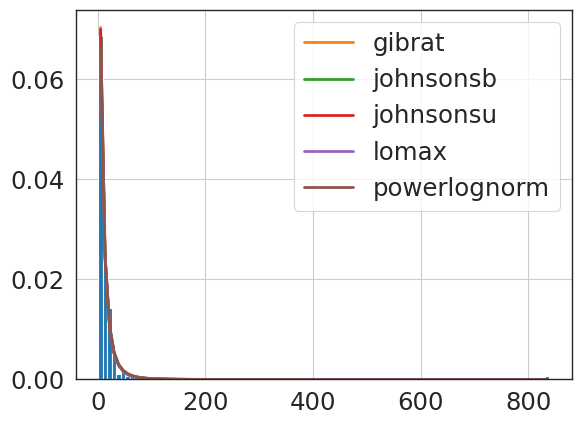

In [73]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [74]:
f.get_best(method = 'sumsquare_error')

{'gibrat': {'loc': -0.04832866533945217, 'scale': 7.79055343602746}}

In [79]:
from scipy.stats import gibrat

data = []
while len(data) < 200:
    value = np.round(gibrat.rvs(loc = -0.04832866533945217, scale = 7.79055343602746))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'].max():
        data.append(value)

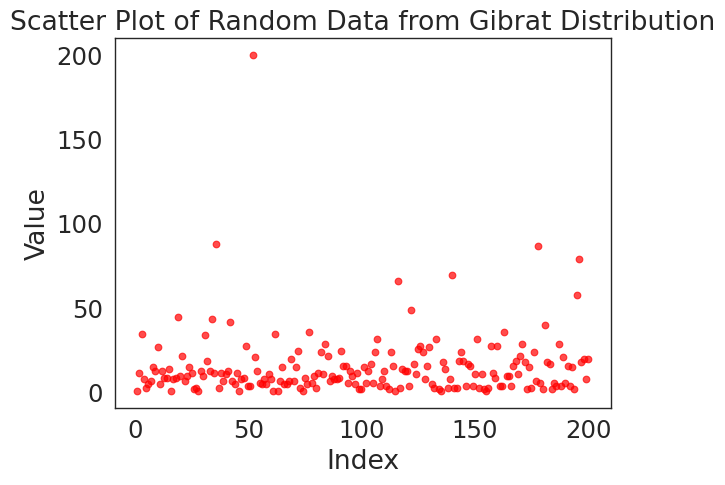

In [81]:
x_values = np.arange(1, len(data)+1)
# Plot a scatter plot of the generated data
plt.scatter(x_values, data, color='red', alpha=0.7)
plt.title('Scatter Plot of Random Data from Gibrat Distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [100]:
generated_dataframe['Total.Fwd.Packets'] = data

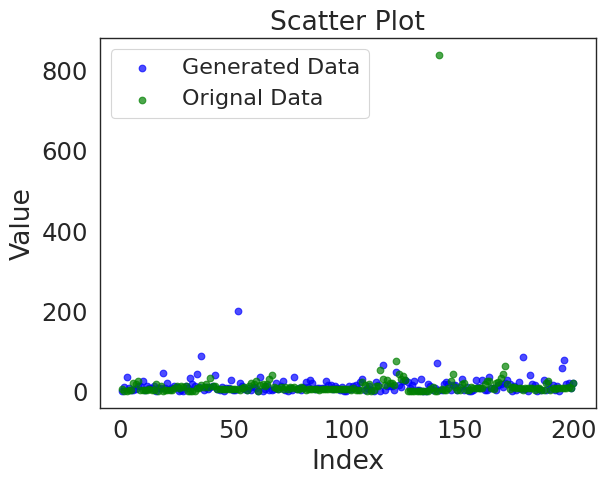

In [83]:
# Plot a scatter plot of the two columns with different colors
plt.scatter(x_values, data, color='blue', label='Generated Data', alpha=0.7)
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'], color='green', alpha=0.7, label = 'Orignal Data')

plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(fontsize='small')
plt.show()

In [101]:
generated_dataframe

,Fwd.PSH.Flags,ProtocolName_encoded,Bwd.PSH.Flags,L7Protocol,Total.Fwd.Packets
0,0,0,0,126,1.0000000000000000
1,0,0,0,126,12.0000000000000000
2,0,0,0,126,35.0000000000000000
3,0,0,0,126,8.0000000000000000
4,0,0,0,126,3.0000000000000000
...,...,...,...,...,...
195,0,0,0,126,79.0000000000000000
196,0,0,0,126,18.0000000000000000
197,0,0,0,126,20.0000000000000000
198,0,0,0,126,8.0000000000000000


# For Second Protocol

Empty DataFrame

In [114]:
generated_dataframe1 = pd.DataFrame()

**Fwd.PSH.Flags**

<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

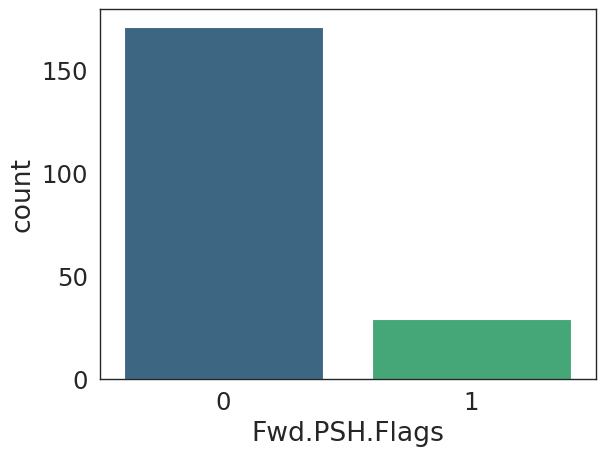

In [103]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Fwd.PSH.Flags']
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Fwd.PSH.Flags'],palette='viridis')

In [110]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    171
1     29
Name: Fwd.PSH.Flags, dtype: int64
[[0.855 0.145]]


In [111]:
# Sample data
categories = [0,1]
probabilities = [0.855, 0.145]

# Generate categorical values based on probabilities
num_samples = 200
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [115]:
generated_dataframe1['Fwd.PSH.Flags'] = generated_values

<Axes: ylabel='count'>

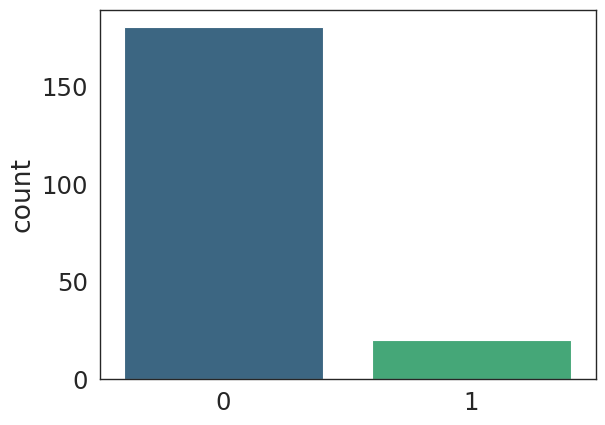

In [112]:
# Create a count plot (bar graph) using Seaborn
sns.countplot(x=generated_values, palette='viridis')

In [106]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Bwd.PSH.Flags'].value_counts()

0    200
Name: Bwd.PSH.Flags, dtype: int64

In [117]:
generated_dataframe1['Bwd.PSH.Flags'] = 0

In [108]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['L7Protocol'].value_counts()

7    200
Name: L7Protocol, dtype: int64

In [158]:
generated_dataframe1['L7Protocol'] = 7

**Total.Fwd.Packets**

In [ ]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'].value_counts()

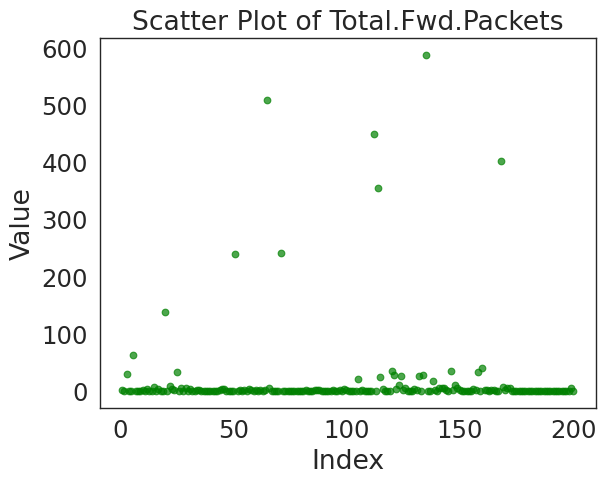

In [122]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

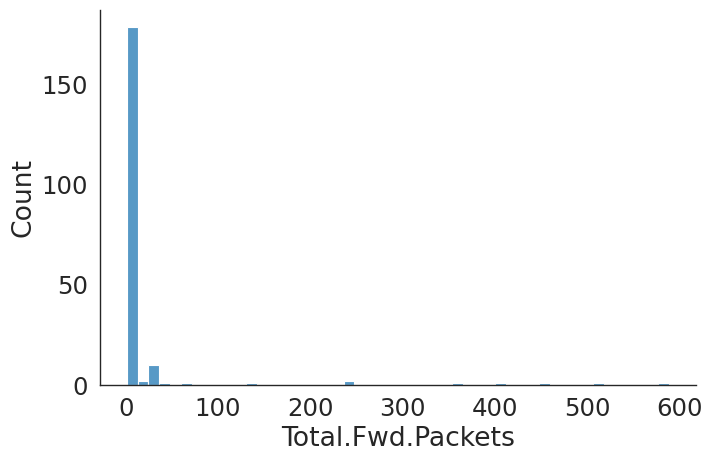

In [121]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataframe_iot1, x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'], kind="hist", bins = 50, aspect =1.5)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gibrat,0.0007940530563821,3390.6843590811145077,3397.2809938142104329,inf,0.3318442729597609,0.0000000000000000
ncf,0.0020467687299561,2314.3438011131438543,2330.8353879458841220,inf,0.2927831828547867,0.0000000000000011
alpha,0.0021150611539062,2246.2808863696332082,2256.1758384692770960,inf,0.2684808094238839,0.0000000000003202
burr12,0.0024802210662766,2156.4786887517398100,2169.6719582179321151,inf,0.3103569825264599,0.0000000000000000
mielke,0.0026130492312245,2208.7263157122397388,2221.9195851784320439,inf,0.2714760656732548,0.0000000000001638


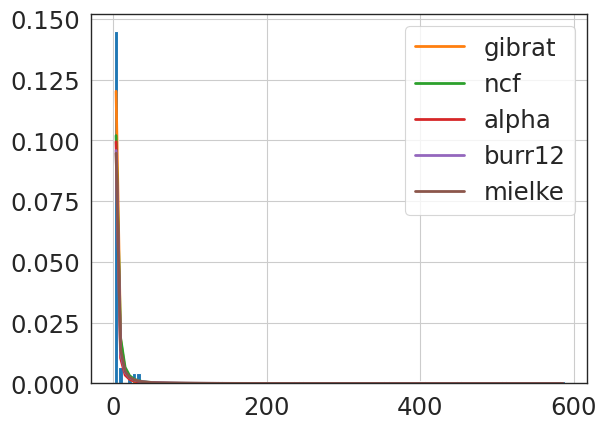

In [123]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [124]:
f.get_best(method = 'sumsquare_error')

{'gibrat': {'loc': 0.7481702288439999, 'scale': 2.3956340864498475}}

In [152]:
from scipy.stats import gibrat

data = []
while len(data) < 200:
    value = np.round(gibrat.rvs(loc = 0.7481702288439999, scale = 2.3956340864498475))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'].max():
        data.append(value)

In [153]:
generated_dataframe1['Total.Fwd.Packets'] = data

In [128]:
generated_dataframe1['ProtocolName_encoded'] = 1

# Third Protocol

In [130]:
generated_dataframe2 = pd.DataFrame()

0    179
1     21
Name: Fwd.PSH.Flags, dtype: int64


<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

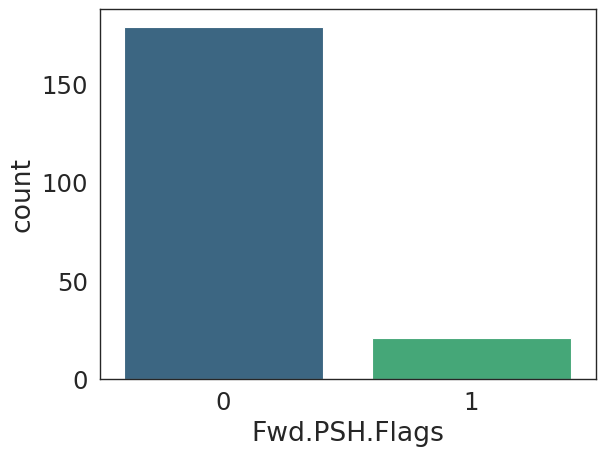

In [136]:
print(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Fwd.PSH.Flags'].value_counts())
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Fwd.PSH.Flags'],palette='viridis')

In [137]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    179
1     21
Name: Fwd.PSH.Flags, dtype: int64
[[0.895 0.105]]


In [138]:
# Sample data
categories = [0,1]
probabilities = [0.895, 0.105]

# Generate categorical values based on probabilities
num_samples = 200
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [139]:
generated_dataframe2['Fwd.PSH.Flags'] = generated_values

In [140]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Bwd.PSH.Flags'].value_counts()

0    200
Name: Bwd.PSH.Flags, dtype: int64

In [141]:
generated_dataframe2['Bwd.PSH.Flags'] = 0

In [142]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['L7Protocol'].value_counts()

131    200
Name: L7Protocol, dtype: int64

In [156]:
generated_dataframe2['L7Protocol'] = 131

**Total.Fwd.Packets**

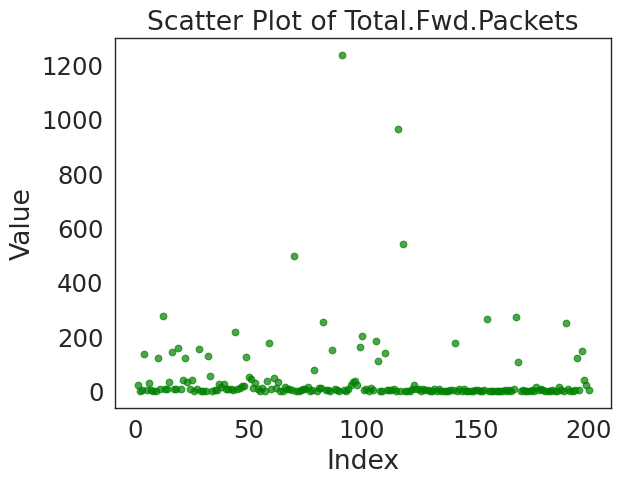

In [144]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

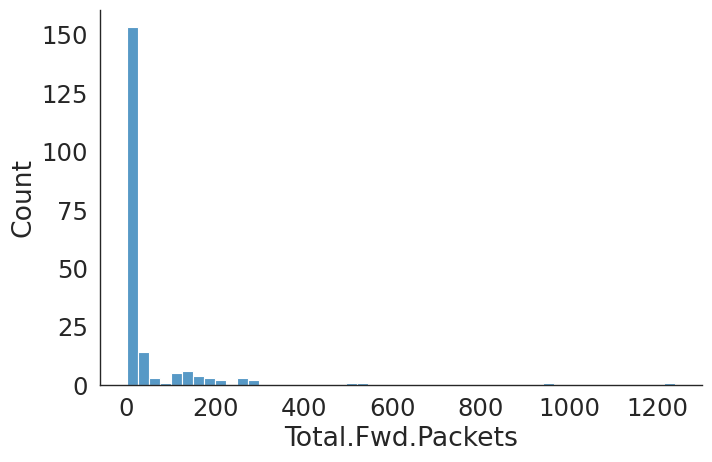

In [145]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataframe_iot1, x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'], kind="hist", bins = 50, aspect =1.5)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3756: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  + integrate.quad(llc, mean, x1,
/usr/local/lib/python3.10/dist-package

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.0000181507675983,2423.0895196361225317,2429.6861543692184568,inf,0.2603300724682392,0.0000000000019077
foldcauchy,0.0000429674847167,2204.3415329127433324,2214.2364850123872202,inf,0.1143470437176841,0.0098242388408080
skewcauchy,0.0000554146119619,2208.3109150755899464,2218.2058671752338341,inf,0.1125584649225628,0.0115784971549049
halfcauchy,0.0000554165831260,2206.3540658513288690,2212.9507005844247942,inf,0.1125655377681180,0.0115710362738295
alpha,0.0000976808773200,2188.0313986682986069,2197.9263507679424947,inf,0.1092022148139876,0.0156494166437418


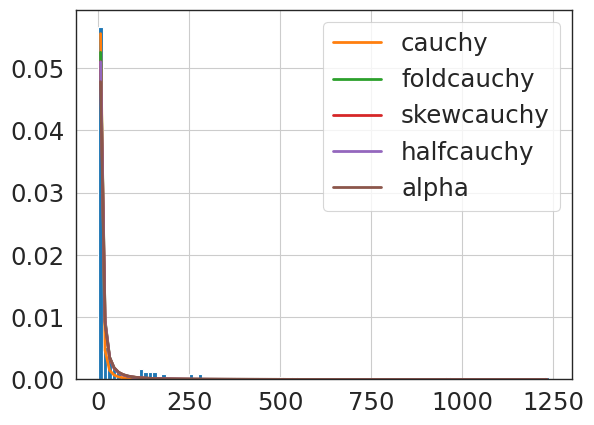

In [146]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [147]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 4.408409174532725, 'scale': 3.551783311880257}}

In [148]:
from scipy.stats import cauchy

data = []
while len(data) < 200:
    value = np.round(cauchy.rvs(loc = 4.408409174532725, scale = 3.551783311880257))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'].max():
        data.append(value)

In [150]:
generated_dataframe2['Total.Fwd.Packets'] = data

In [161]:
generated_dataframe2['ProtocolName_encoded'] = 2

# Fourth Protocol

In [162]:
generated_dataframe3 = pd.DataFrame()

0    173
1     27
Name: Fwd.PSH.Flags, dtype: int64


<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

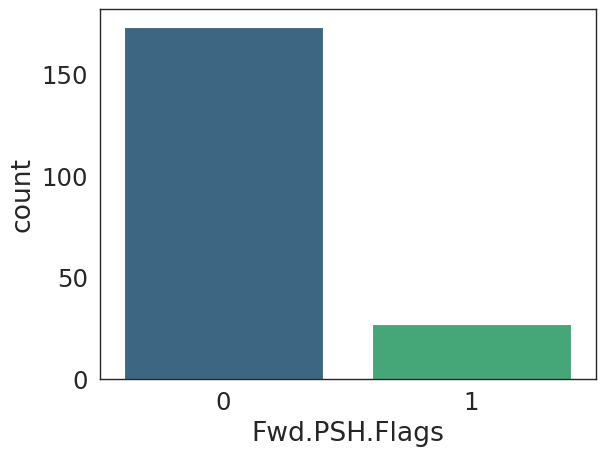

In [163]:
print(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Fwd.PSH.Flags'].value_counts())
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Fwd.PSH.Flags'],palette='viridis')

In [164]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    173
1     27
Name: Fwd.PSH.Flags, dtype: int64
[[0.865 0.135]]


In [165]:
# Sample data
categories = [0,1]
probabilities = [0.865, 0.135]

# Generate categorical values based on probabilities
num_samples = 200
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [166]:
generated_dataframe3['Fwd.PSH.Flags'] = generated_values

In [167]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Bwd.PSH.Flags'].value_counts()

0    200
Name: Bwd.PSH.Flags, dtype: int64

In [168]:
generated_dataframe3['Bwd.PSH.Flags'] = 0

In [169]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['L7Protocol'].value_counts()

91    200
Name: L7Protocol, dtype: int64

In [170]:
generated_dataframe3['L7Protocol'] = 91

In [173]:
generated_dataframe3['ProtocolName_encoded'] = 3

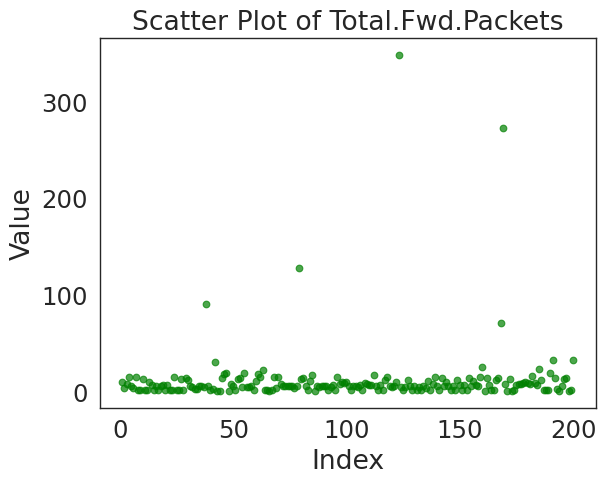

In [174]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

**Total.Fwd.Packets**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,0.0006154989656125,1759.2504716609182651,1769.1454237605623803,inf,0.1712636483803032,0.0000134174889222
loglaplace,0.0007819785535318,1901.9676439389277220,1911.8625960385718372,inf,0.1474398739214603,0.0002934249289523
alpha,0.0010413296510623,1889.3528342274632905,1899.2477863271074057,inf,0.1550207481245508,0.0001156811886247
wald,0.0010617575228973,2818.8075175308263169,2825.4041522639222421,inf,0.1596457776910265,0.0000640508436406
kappa3,0.0011795842243760,2025.9054585570693234,2035.8004106567134386,inf,0.1460394552542880,0.0003466741362240


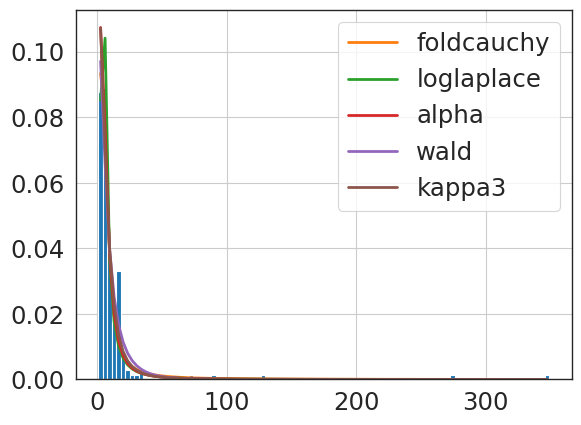

In [177]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [178]:
f.get_best(method = 'sumsquare_error')

{'foldcauchy': {'c': 0.8697523889187618,
  'loc': 0.9999999976454452,
  'scale': 4.116436150467477}}

In [180]:
from scipy.stats import foldcauchy

data = []
while len(data) < 200:
    value = np.round(foldcauchy.rvs(c = 0.8697523889187618 ,loc = 0.9999999976454452, scale = 4.116436150467477))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'].max():
        data.append(value)

In [181]:
generated_dataframe3['Total.Fwd.Packets'] = data

# Fifth Protocol

In [183]:
generated_dataframe4 = pd.DataFrame()

0    199
1      1
Name: Fwd.PSH.Flags, dtype: int64


<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

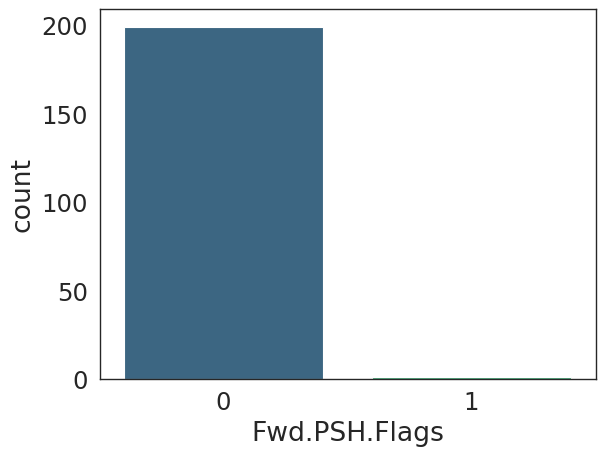

In [184]:
print(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Fwd.PSH.Flags'].value_counts())
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Fwd.PSH.Flags'],palette='viridis')

In [185]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    199
1      1
Name: Fwd.PSH.Flags, dtype: int64
[[0.995 0.005]]


In [186]:
# Sample data
categories = [0,1]
probabilities = [0.995, 0.005]

# Generate categorical values based on probabilities
num_samples = 200
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [187]:
generated_dataframe4['Fwd.PSH.Flags'] = generated_values

In [188]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Bwd.PSH.Flags'].value_counts()

0    200
Name: Bwd.PSH.Flags, dtype: int64

In [189]:
generated_dataframe4['Bwd.PSH.Flags'] = 0

In [190]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['L7Protocol'].value_counts()

124    200
Name: L7Protocol, dtype: int64

In [191]:
generated_dataframe4['L7Protocol'] = 124

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
mielke,0.0000373868642589,2136.2358302805328094,2149.4290997467251145,inf,0.1485748525675073,0.0002560270357962
burr,0.0000373869994126,2136.2364994322297207,2149.4297688984220258,inf,0.1485743812624924,0.0002560415876139
genextreme,0.0000380474247400,2120.0110522408226643,2129.9060043404665521,inf,0.1506992326347282,0.0001977970559142
invweibull,0.0000380476590163,2120.0154366637366365,2129.9103887633805243,inf,0.1506981423028711,0.0001978234423832
invgamma,0.0000427322232020,2100.3714992748614350,2110.2664513745053227,inf,0.1567904342462910,0.0000924556299692


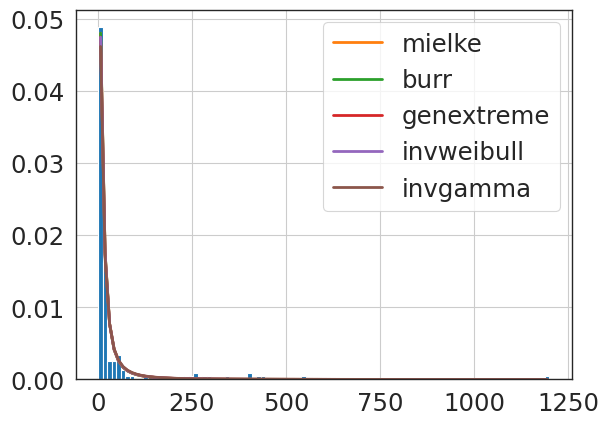

In [192]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [193]:
f.get_best(method = 'sumsquare_error')

{'mielke': {'k': 5.508565372490477,
  's': 1.2977129927901507,
  'loc': -1.205608301331988,
  'scale': 3.765694421836992}}

In [194]:
from scipy.stats import mielke

data = []
while len(data) < 200:
    value = np.round(mielke.rvs(k = 5.508565372490477,s= 1.2977129927901507,loc = -1.205608301331988, scale = 3.765694421836992))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Total.Fwd.Packets'].max():
        data.append(value)

In [195]:
generated_dataframe4['Total.Fwd.Packets'] =  data

In [197]:
generated_dataframe4['ProtocolName_encoded'] = 4

# Combine DataFrame

In [198]:
test_df = pd.concat([generated_dataframe,generated_dataframe1,generated_dataframe2,generated_dataframe3,generated_dataframe4], ignore_index=True)

In [199]:
test_df

,Fwd.PSH.Flags,ProtocolName_encoded,Bwd.PSH.Flags,L7Protocol,Total.Fwd.Packets
0,0,0,0,126,1.0000000000000000
1,0,0,0,126,12.0000000000000000
2,0,0,0,126,35.0000000000000000
3,0,0,0,126,8.0000000000000000
4,0,0,0,126,3.0000000000000000
...,...,...,...,...,...
995,0,4,0,124,6.0000000000000000
996,0,4,0,124,4.0000000000000000
997,0,4,0,124,34.0000000000000000
998,0,4,0,124,4.0000000000000000


# **Generation of Json**

In [84]:
parameters = {
    'Google':
     {
    "Categorical" : {
        'name': 'Fwd.PSH.Flags',
        'Categories': [0,1],
        'Probabilities': [0.955, 0.045]
                    },
    'Continous': {
        'name': 'Total.Fwd.Packets',
        'param': {'gibrat': {'loc': -0.04832866533945217, 'scale': 7.79055343602746}}
                  }
    }
}

# **Machine learning Classifier**

In [201]:
# Assuming your data is in a DataFrame named 'df'
# Features (X)
X = dataframe_iot1[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]

# Target variable (y)
y = dataframe_iot1['ProtocolName_encoded']


# Initialize a RandomForestClassifier (you can choose another algorithm based on your requirements)
model = RandomForestClassifier(n_estimators= 10, random_state=42)

# Train the model
model.fit(X, y)

X_test = test_df[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]
y_test = test_df['ProtocolName_encoded']
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

